# Part 1: Download data and set directories

In [0]:
# Usaremos una base de datos de imágenes con dos clases: perros y gatos.

# El objetivo es diseñar redes neuronales de convolución para clasificar perros de gatos.
# Este problema es mucho más complejo que los anteriores, ya que: 1) las características
# visuales que comparten perros y gatos pueden ser altas; y 2) las imágenes pueden contener
# background común. Estas dos características hace difícil separa las imágenes.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# Download data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
# Define paths to training and validation images
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

# Specify them by class
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with training dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')      # directory with validation cat pictures
val_dogs_dir = os.path.join(val_dir, 'dogs')      # directory with validation dog pictures

In [5]:
# Count how many of them are there
n_cats_train = len(os.listdir(train_cats_dir))
n_dogs_train = len(os.listdir(train_dogs_dir))

n_cats_val = len(os.listdir(val_cats_dir))
n_dogs_val = len(os.listdir(val_dogs_dir))

n_total_train = n_cats_train + n_dogs_train
n_total_val = n_cats_val + n_dogs_val

# Print some info
print('total training cat images:', n_cats_train)
print('total training dog images:', n_dogs_train)

print('total validation cat images:', n_cats_val)
print('total validation dog images:', n_dogs_val)
print("--")
print("Total training images:", n_total_train)
print("Total validation images:", n_total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# No data has been loaded yet
whos

Variable             Type               Data/Info
-------------------------------------------------
Conv2D               type               <class 'keras.layers.convolutional.Conv2D'>
Dense                type               <class 'keras.layers.core.Dense'>
Dropout              type               <class 'keras.layers.core.Dropout'>
Flatten              type               <class 'keras.layers.core.Flatten'>
ImageDataGenerator   type               <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
MaxPooling2D         type               <class 'keras.layers.pooling.MaxPooling2D'>
PATH                 str                /root/.keras/datasets/cats_and_dogs_filtered
Sequential           type               <class 'keras.engine.sequential.Sequential'>
UpSampling2D         type               <class 'keras.layers.convolutional.UpSampling2D'>
keras                TFModuleWrapper    <module 'tensorflow.pytho<...>i/_v1/keras/__init__.py'>
n_cats_train         int                1000
n_cats_va

# Part 2: Define batch-generator process

In [0]:
# Define some constants
batch_size = 128
n_epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
# Define generator objects for training and validation data
train_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)

In [9]:
# Define method to load images from disk, apply rescaling, and resize them into specified size.
train_gen = train_generator.flow_from_directory(batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                class_mode='binary')
val_gen = val_generator.flow_from_directory(batch_size=batch_size,
                                            directory=val_dir,
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            class_mode='binary')
# No data is been loaded yet

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(128, 150, 150, 3)
0.0
1.0
(128,)


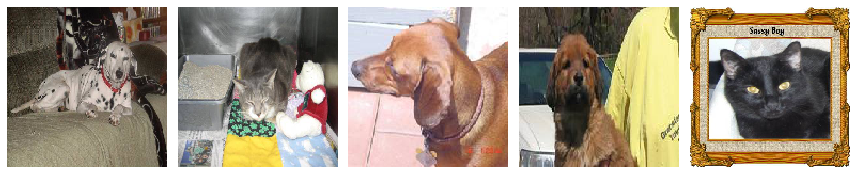

[1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]


In [10]:
# This 'next' function returns a batch (size=128 in this example) from the dataset
sample_x, sample_y = next(train_gen)
print(sample_x.shape)
print(sample_x.min())
print(sample_x.max())
print(sample_y.shape)

# Show a few of them
fig, axes = plt.subplots(1, 5, figsize=(12, 12))
axes = axes.flatten()
for img, ax in zip(sample_x[:5], axes):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

print(sample_y[:20])

# Part 3: Create CNN model and train it

In [0]:
# == Q1 ==
# Usando la siguiente red, pude conseguir una pérdida de 0.2485 y exactutid de 0.5707.
# Diseña una red que te permita mejorar este desempeño.
# ¿Puedes lograr exactitud >= 0.8?
# ¿Cuál es la pérdida asociada?
# ¿Cuántos parámetros tiene tu modelo?
# ¿Qué otros hiper-parámetros definiste?

In [11]:
# Create a CNN
CNN = Sequential([
    Dropout(0.001, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(64, 7, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 7, activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 5, activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 5, activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')
])

CNN.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 64)      9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 128)       401536    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 256)       819456    


In [0]:
# Compile: Define training parameters
CNN.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [0]:
# Train model
history = CNN.fit_generator(
    generator=train_gen,
    steps_per_epoch=n_total_train//batch_size,
    epochs=n_epochs,
    validation_data=val_gen,
    validation_steps=n_total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 10s 672ms/step - loss: 0.2500 - acc: 0.4988 - val_loss: 0.2499 - val_acc: 0.4967
Epoch 2/15
15/15 [==============================] - 9s 594ms/step - loss: 0.2498 - acc: 0.4977 - val_loss: 0.2497 - val_acc: 0.5092
Epoch 3/15
15/15 [==============================] - 9s 600ms/step - loss: 0.2497 - acc: 0.5058 - val_loss: 0.2496 - val_acc: 0.5057
Epoch 4/15
15/15 [==============================] - 9s 610ms/step - loss: 0.2497 - acc: 0.5047 - val_loss: 0.2496 - val_acc: 0.4954
Epoch 5/15
15/15 [==============================] - 9s 605ms/step - loss: 0.2493 - acc: 0.5124 - val_loss: 0.2495 - val_acc: 0.5000
Epoch 6/15
15/15 [==============================] - 9s 575ms/step - loss: 0.2496 - acc: 0.5013 - val_loss: 0.2495 - val_acc: 0.5757
Epoch 7/15
15/15 [==============================] - 8s 562ms/step - loss: 0.2492 - acc: 0.5313 - val_loss: 0.2493 - val_acc: 0.4966
Epoch 8/15
15/15 [==============================] - 8s 533ms/step - loss: 0

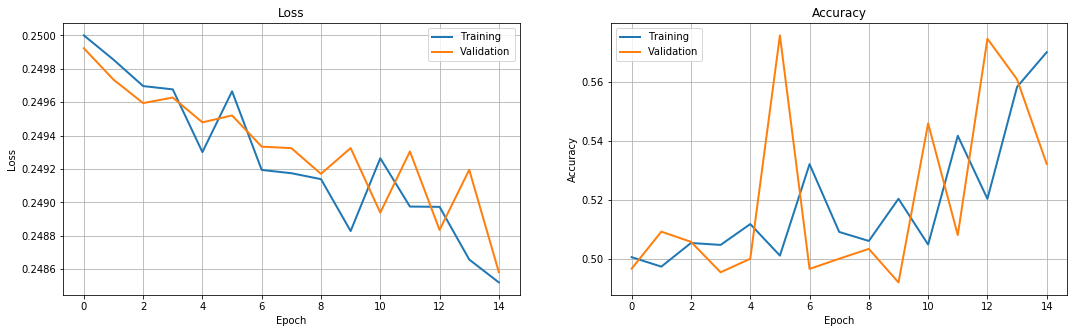

In [0]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

# Part 4: A new type of CNN

In [0]:
# Importa los dígitos MNIST
# == Q2 ==
# Revisa esta y las tres celdas siguientes, y explica por qué crees que en esta celda,
# al importar las imágenes, las asignamos a una variable llamada y (en vez de a x como
# lo hicimos en alguna tarea anterior).
from keras.datasets import mnist
(y_train, _), (y_test, _) = mnist.load_data()
y_train = y_train / 255.
y_test  = y_test  / 255.
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], y_train.shape[2], 1))
y_test  = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))

print("Shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes
y_train: (60000, 28, 28, 1)
y_test: (10000, 28, 28, 1)


In [0]:
# == Q3 ==
# Aquí defino una funión. ¿Puedes explica qué es lo que hace?
from skimage.transform import resize
def a_function(IMG):
  img = resize(IMG.copy(), (7, 7))
  for row in range(7):
    for col in range(7):
      thresh = np.random.rand()
      if thresh > 0.9:
        img[row, col] = np.abs(img[row, col] - 1)
  return img

In [0]:
# Ahora sí genero x (señales de entrada)
x_train = np.array([a_function(IMG) for IMG in y_train])
x_test  = np.array([a_function(IMG) for IMG in y_test ])

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

Shapes
x_train: (60000, 7, 7, 1)
x_test: (10000, 7, 7, 1)


In [0]:
# Create a CNN
CNN = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(32, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    UpSampling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(1, 3, padding='same', activation='sigmoid'),
])

CNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 7, 7, 32)          320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)       

In [0]:
# Compile: Define training parameters
CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = CNN.fit(x=x_train, y=y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1, shuffle=True)




Train on 54000 samples, validate on 6000 samples
Epoch 1/10





54000/54000 [==============================] - 19s 360us/step - loss: 0.1625 - acc: 0.8053 - val_loss: 0.1138 - val_acc: 0.8089
Epoch 2/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.1073 - acc: 0.8104 - val_loss: 0.1031 - val_acc: 0.8120
Epoch 3/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.1000 - acc: 0.8116 - val_loss: 0.0979 - val_acc: 0.8121
Epoch 4/10
54000/54000 [==============================] - 4s 70us/step - loss: 0.0964 - acc: 0.8121 - val_loss: 0.0959 - val_acc: 0.8121
Epoch 5/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.0939 - acc: 0.8125 - val_loss: 0.0930 - val_acc: 0.8129
Epoch 6/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.0923 - acc: 0.8127 - val_loss: 0.0921 - val_acc: 0.8134
Epoch 7/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.0910 - acc: 0.8129 - val_loss: 0.0908 

In [0]:
# == Q4 ==
# ¿Qué problema está resolviendo esta red?

# == Q5 ==
# ¿Puedes mejorar el modelo para aumentar la exactitud a más de 0.95?
# Reporta el modelo resultante.